# 主成分分析

In [132]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 訓練データ生成

In [133]:
n_sample = 100

def gen_data(n_sample):
    mean = [0, 0]
    cov = [[2, 0.7], [0.7, 1]]
    return np.random.multivariate_normal(mean, cov, n_sample)

def plt_data(X):
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

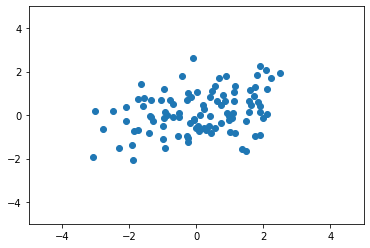

In [134]:
X = gen_data(n_sample)
plt_data(X)

## 学習

訓練データ$X = [\boldsymbol{x}_{1}, \boldsymbol{x}_{2}, ..., \boldsymbol{x}_{n}]^{\mathrm{T}}$に対して$\mathbb{E}[\boldsymbol{x}] = \boldsymbol{0}$となるように変換する。

すると、不偏共分散行列は$Var[\boldsymbol{x}] = \frac{1}{n-1} X^{\mathrm{T}}X$と書ける。

$Var[\boldsymbol{x}]$を固有値分解し、固有値の大きい順に対応する固有ベクトルを第1主成分($\boldsymbol{w}_{1}$), 第2主成分($\boldsymbol{w}_{2}$), ...とよぶ。

In [135]:
n_components=2

def get_moments(X):
    mean = X.mean(axis=0)
    stan_cov = np.dot((X - mean).T, X - mean) / (len(X) - 1)
    return mean, stan_cov
    
def get_components(eigenvectors, n_components):
#     W = eigenvectors[:, -n_components:]
#     return W.T[::-1]
    W = eigenvectors[:, ::-1][:, :n_components]
    return W.T

def plt_result(X, first, second):
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    # 第１主成分
    plt.quiver(0, 0, first[0], first[1], width=0.01, scale=6, color='red')
    # 第２主成分
    plt.quiver(0, 0, second[0], second[1], width=0.01, scale=6, color='green')

ここで与えられたコードでの結果は、下記の図を見る限り、第１主成分（赤）と第2主成分（緑）が逆になっているようにみえる。

（後半でsklearnの実装と比較）

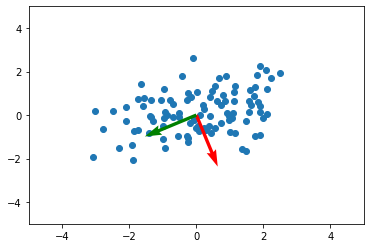

In [136]:
#分散共分散行列を標準化
meean, stan_cov = get_moments(X)
#固有値と固有ベクトルを計算
eigenvalues, eigenvectors = np.linalg.eigh(stan_cov)
components = get_components(eigenvectors, n_components)

plt_result(X, eigenvectors[0, :], eigenvectors[1, :])

In [137]:
eigenvectors

array([[ 0.38346175, -0.92355676],
       [-0.92355676, -0.38346175]])

In [138]:
eigenvalues

array([0.76911777, 2.0301928 ])

上記の固有値を見ると、大小関係が配慮されていないようだ。

## 変換（射影）

元のデータを$m$次元に変換(射影)するときは行列$W$を$W=[\boldsymbol{w}_{1}, \boldsymbol{w}_{2}, \cdots, \boldsymbol{w}_{m}]$とし、データ点$\boldsymbol{x}$を$\boldsymbol{z} = W^{\mathrm{T}} \boldsymbol{x}$によって変換(射影)する。

よって、データ$X$に対しては$Z = X^{\mathrm{T}}W$によって変換する。

In [139]:
def transform_by_pca(X, pca):
    mean = X.mean(axis=0)
    return np.dot(X-mean, components)

与えられた上記のコードは、外部の変数(`components`)を利用しており、不適切に思われる(引数`pca`未使用)。以下修正版の挙動を確認する。

In [140]:
def transform_by_pca_fixed(X, pca):
    mean = X.mean(axis=0)
    return np.dot(X-mean, pca)

(-5.0, 5.0)

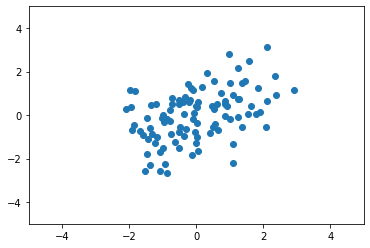

In [141]:
Z = transform_by_pca(X, components.T)
plt.scatter(Z[:, 0], Z[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)

(-5.0, 5.0)

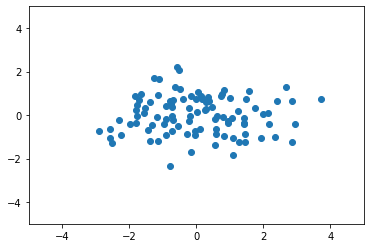

In [142]:
Z = transform_by_pca_fixed(X, components.T)
plt.scatter(Z[:, 0], Z[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)

## 逆変換

射影されたデータ点$\boldsymbol{z}$を元のデータ空間へ逆変換するときは$\bar{\boldsymbol{x}} = (W^{\mathrm{T}})^{-1} \boldsymbol{z} = W \boldsymbol{z}$によって変換する。

よって、射影されたデータ$Z$に対しては$\bar{X} = ZW^{\mathrm{T}}$によって変換する。

In [143]:
mean = X.mean(axis=0)
X_ = np.dot(Z, components.T) + mean

(-5.0, 5.0)

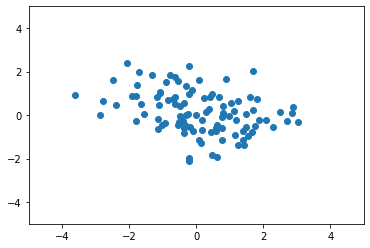

In [144]:
plt.scatter(X_[:, 0], X_[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)

## skleanによる実装

In [145]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [146]:
print('components: {}'.format(pca.components_))
print('mean: {}'.format(pca.mean_))
print('covariance: {}'.format(pca.get_covariance())) 

components: [[-0.92355676 -0.38346175]
 [-0.38346175  0.92355676]]
mean: [0.07856242 0.14391024]
covariance: [[1.84476065 0.44660807]
 [0.44660807 0.95454992]]


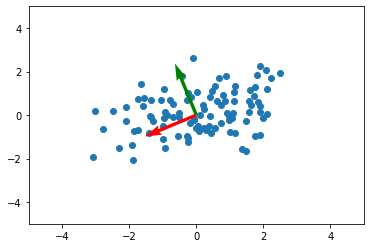

In [147]:
plt_result(X, pca.components_[0, :], pca.components_[1, :])

In [148]:
# 第１主成分
print(pca.components_[0, :])
# 第２主成分
print(pca.components_[1, :])

[-0.92355676 -0.38346175]
[-0.38346175  0.92355676]


components: [[-0.92355676 -0.38346175]
 [-0.38346175  0.92355676]]
mean: [0.07856242 0.14391024]
covariance: [[1.84476065 0.44660807]
 [0.44660807 0.95454992]]


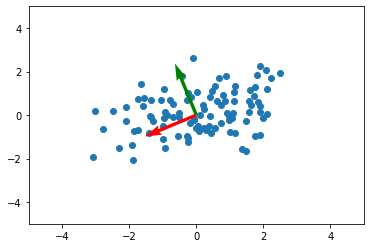

In [149]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
plt_result(X, pca.components_[0, :], pca.components_[1, :])

print('components: {}'.format(pca.components_))
print('mean: {}'.format(pca.mean_))
print('covariance: {}'.format(pca.get_covariance()))


# 考察

ランダムではないデータを用いて、 PCAの全体像をつかむ。

In [150]:
X = np.array([[-2,2],[-1,-1],[0,0],[1,1],[2,-2]])
X

array([[-2,  2],
       [-1, -1],
       [ 0,  0],
       [ 1,  1],
       [ 2, -2]])

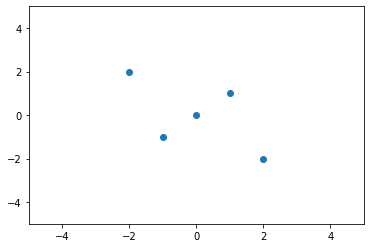

In [151]:
plt_data(X)

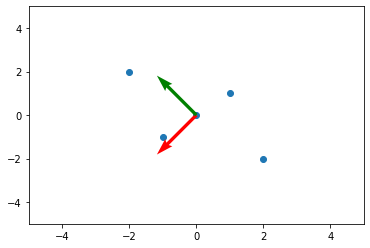

In [152]:
#分散共分散行列を標準化
meean, stan_cov = get_moments(X)
#固有値と固有ベクトルを計算
eigenvalues, eigenvectors = np.linalg.eigh(stan_cov)
components = get_components(eigenvectors, n_components)

plt_result(X, eigenvectors[0, :], eigenvectors[1, :])

In [153]:
eigenvectors

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [154]:
eigenvectors[0, :]

array([-0.70710678, -0.70710678])

In [155]:
eigenvalues

array([1., 4.])

eigenvalueの大きいほう(4)が第1主成分(`[-0.70710678,  0.70710678]`)であることに留意。

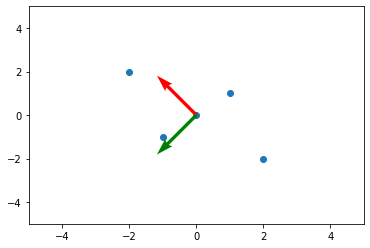

In [156]:
plt_result(X, np.array([-0.70710678, 0.70710678]), np.array([-0.70710678, -0.70710678]))

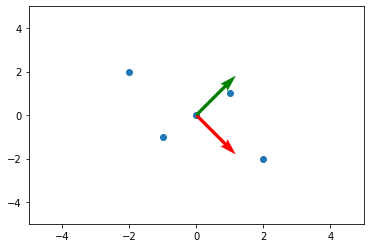

In [157]:
plt_result(X, np.array([0.70710678, -0.70710678]), np.array([0.70710678, 0.70710678]))

In [158]:
import math
root_two = math.sqrt(2)
1/root_two

0.7071067811865475

(-5.0, 5.0)

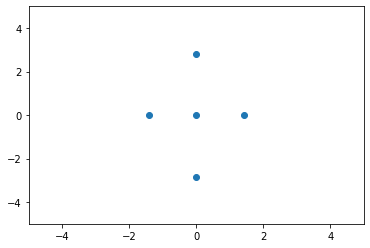

In [159]:
Z = transform_by_pca(X, components.T)
plt.scatter(Z[:, 0], Z[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [160]:
Z

array([[ 0.        , -2.82842712],
       [ 1.41421356,  0.        ],
       [ 0.        ,  0.        ],
       [-1.41421356,  0.        ],
       [ 0.        ,  2.82842712]])

上記の射影では、主成分の並びの影響を受けているので、以下に想定される射影を実装してみる。

(-5.0, 5.0)

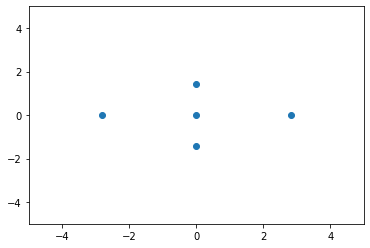

In [161]:
eigenvectors_custom = np.array([[1/math.sqrt(2), -1/math.sqrt(2)],[1/math.sqrt(2), 1/math.sqrt(2)]])
components_custom = get_components(eigenvectors_custom, 2)
Z_custom = transform_by_pca_fixed(X, components_custom.T)
plt.scatter(Z_custom[:, 0], Z_custom[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [162]:
Z_custom

array([[ 2.82842712,  0.        ],
       [ 0.        , -1.41421356],
       [ 0.        ,  0.        ],
       [ 0.        ,  1.41421356],
       [-2.82842712,  0.        ]])

コンピュータの計算結果（小数点表示）と背後にある計算ロジックとの関連を確認。

In [163]:
root_two = np.sqrt(2)

In [164]:
root_two

1.4142135623730951

In [165]:
2*root_two

2.8284271247461903

## sklearnによる実装

In [166]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

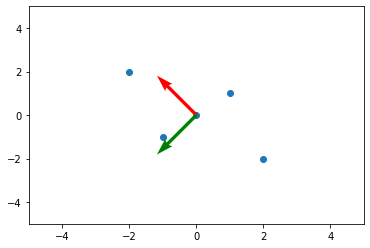

In [167]:
plt_result(X, pca.components_[0, :], pca.components_[1, :])

In [168]:
# 第１主成分
print(pca.components_[0, :])
# 第２主成分
print(pca.components_[1, :])

[-0.70710678  0.70710678]
[-0.70710678 -0.70710678]


In [169]:
print(pca.components_)

[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


In [170]:
eigenvectors_custom = np.array([[1/math.sqrt(2),-1/math.sqrt(2)],[1/math.sqrt(2),1/math.sqrt(2)]])
eigenvectors_custom

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])